In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

!gdown 1QUlM519dvEzQtTSnIzk4CClaL_IopisA

df = pd.read_csv("/content/CarPrice_Dataset_GDSC_article.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1QUlM519dvEzQtTSnIzk4CClaL_IopisA
To: /content/CarPrice_Dataset_GDSC_article.csv
100% 26.0k/26.0k [00:00<00:00, 43.3MB/s]


CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0        rwd          front       88.6      168.8      64.1  ...         130   
1        rwd          front       88.6      168.8      64.1  ...         130   
2        rwd          front       94.5      171.2      65.5  ...         152   
3        fwd          front       99.8      176.6      66.2  ...         109   
4        4wd          front       99.4      176.6      66.4  ...         136   

   fuelsystem boreratio stroke  compressionratio horsepower  peakrpm  citympg  \
0        mpfi      3.47   2.68               9.0        111     5000       21   
1        mpfi      3.47   2.68               9.0        111     5000       21   
2        mpfi      2.68   3.47               9.0        154     5000       19   
3        mpfi      3.19   3.40              10.0        102     5500       24   
4        mpfi      3.19   3.40               8.0        115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 24 columns]

In [2]:
print(df.info())
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!="O"]
print(numerical_feature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

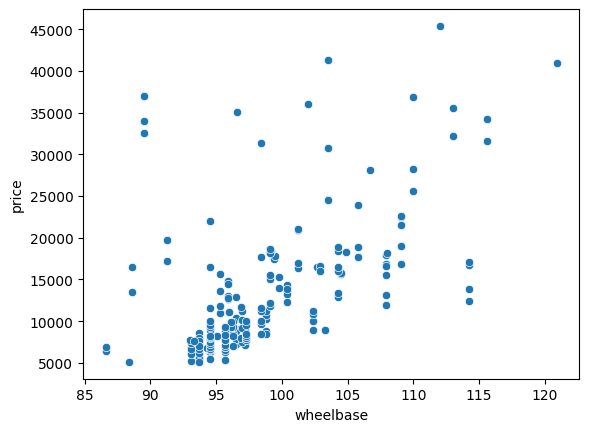

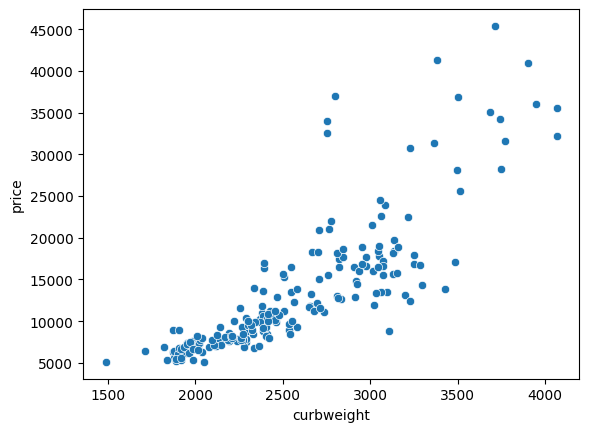

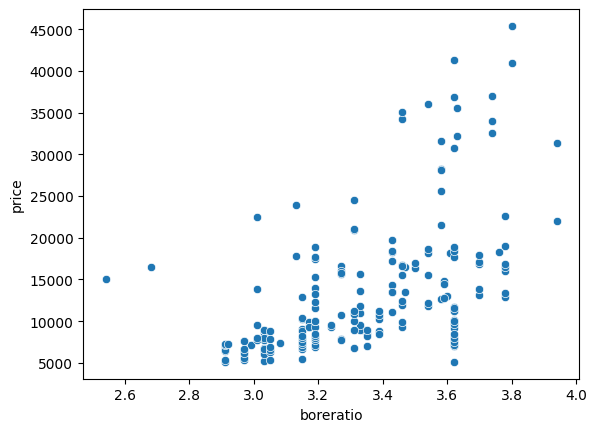

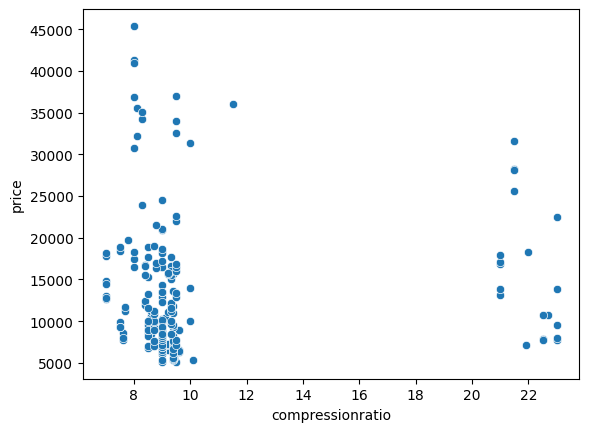

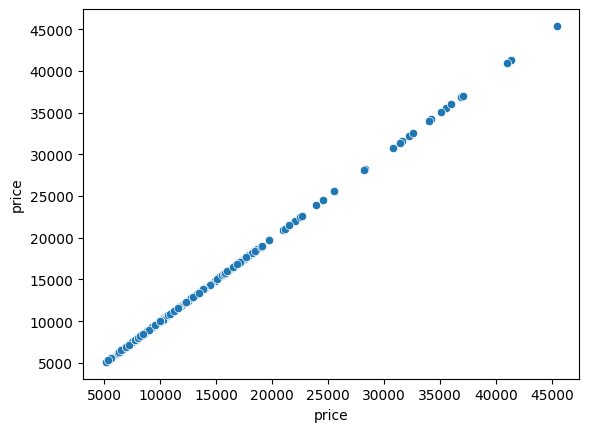

In [3]:
for feature in numerical_feature:
    sns.scatterplot(x = df[feature], y = df['price'])
    plt.show()

#Dropping non-numeric columns

In [4]:
df = df.drop(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'doornumber', 'cylindernumber'], axis=1)
df = df.drop(['peakrpm', 'compressionratio', 'peakrpm', 'stroke', 'carheight', 'wheelbase'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carlength   205 non-null    float64
 1   carwidth    205 non-null    float64
 2   curbweight  205 non-null    int64  
 3   enginesize  205 non-null    int64  
 4   boreratio   205 non-null    float64
 5   horsepower  205 non-null    int64  
 6   citympg     205 non-null    int64  
 7   highwaympg  205 non-null    int64  
 8   price       205 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 14.5 KB
None


#Training set and test set split

In [5]:
X=df.drop(['price'], axis=1)
y=df['price']
print(X)
print(y)

     carlength  carwidth  curbweight  enginesize  boreratio  horsepower  \
0        168.8      64.1        2548         130       3.47         111   
1        168.8      64.1        2548         130       3.47         111   
2        171.2      65.5        2823         152       2.68         154   
3        176.6      66.2        2337         109       3.19         102   
4        176.6      66.4        2824         136       3.19         115   
..         ...       ...         ...         ...        ...         ...   
200      188.8      68.9        2952         141       3.78         114   
201      188.8      68.8        3049         141       3.78         160   
202      188.8      68.9        3012         173       3.58         134   
203      188.8      68.9        3217         145       3.01         106   
204      188.8      68.9        3062         141       3.78         114   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19      

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [7]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_predLR = lr.predict(X_test)
# print(y_test)
# print(y_predLR)

resultDf = pd.DataFrame({'y_test': y_test, 'y_predict':y_predLR})
print(resultDf)

        y_test     y_predict
15   30760.000  25774.376775
9    17859.167  19433.547248
100   9549.000  11276.193526
132  11850.000  13488.985811
68   28248.000  24209.326349
95    7799.000   6529.318936
159   7788.000   7944.431479
162   9258.000   7406.001527
147  10198.000  10337.956586
182   7775.000   7657.611754
191  13295.000  15426.958161
164   8238.000   7123.878365
65   18280.000  15393.556827
175   9988.000  12222.208810
73   40960.000  38181.542531
152   6488.000   5963.231066
18    5151.000   -970.635918
82   12629.000  18443.618915
86    8189.000  11480.198375
143   9960.000  10037.368733
60    8495.000  11806.523563


# evaluate with R2 score
[link text](https://scikit-learn.org/stable/modules/model_evaluation.html)

For this reason the default behaviour of r2_score is to replace them with 1.0 (perfect predictions) or 0.0 (imperfect predictions)

In [9]:
r2_score(y_test, y_predLR)

0.896184162664483